## Best Subset Selection

#### Installations

In [102]:
import itertools
import time
from tqdm import trange, tqdm_notebook
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse 
from sklearn.model_selection import train_test_split

%matplotlib inline 
plt.style.use('ggplot')

### Data Cleaning

In [106]:
pd.set_option('display.max_columns', None)
# Took you dataset cleaning work Kal. Don't know if you mind
TRAIN_DF = pd.read_csv('2012-Electricity-Consumption.csv')
TEST_DF = pd.read_csv('2018-Electricity-Consumption.csv')

                            # Continoues variables
train_data = TRAIN_DF[['ELCNS', 'SQFT', 'NFLOOR', 'YRCON', 'WKHRS', 'NWKER', 'HEATP', 'COOLP', 'PCTERMN', 'LAPTPN', 'PRNTRN', 'COPIERN', 'LTOHRP', 'LTNHRP', 'DAYLTP',
                            # Categorical
                            'OPEN24', 'OPNWE', 'PBAPLUS', 'RENRFF', 'RENINS', 'CENDIV', 'PBA', 'FREESTN', 'RFTILT', 'WLCNS', 
                            'BLDSHP', 'BLDSHP', 'YRCONC', 'RENHVC', 'RENWIN', 'RENLGT', 'RENELC', 'RENINS', 'RENSTR']]

# Drop rows with NA values
train_data = train_data.dropna()

# Create Total EUI
y_train = pd.DataFrame(data={"TOTAL_EUI": train_data["ELCNS"]/train_data["SQFT"]})

# Remove explanatory variables from train and test datasets
train_data = train_data.drop("SQFT", axis=1)
train_data = train_data.drop("ELCNS", axis=1)

train_data = train_data.reset_index()
cat_features = ['OPEN24', 'OPNWE', 'PBAPLUS', 'RENRFF', 'RENINS', 'CENDIV', 'PBA', 'FREESTN', 'RFTILT', 
                'WLCNS','BLDSHP', 'BLDSHP', 'YRCONC', 'RENHVC', 'RENWIN', 'RENLGT', 'RENELC', 'RENINS', 'RENSTR']
cont_features = ['ELCNS', 'SQFT', 'NFLOOR', 'YRCON', 'WKHRS', 'NWKER', 'HEATP', 'COOLP', 'PCTERMN', 'LAPTPN', 'PRNTRN', 'COPIERN', 'LTOHRP', 'LTNHRP', 'DAYLTP']

for feature in cat_features: 
  train_data[feature] = train_data[feature].astype(str)

one_hot = pd.get_dummies(train_data, prefix=cat_features)

print(one_hot.head)

<bound method NDFrame.head of       index  NFLOOR  YRCON  WKHRS  NWKER  HEATP  COOLP  PCTERMN  LAPTPN  \
0         0       1   1975     16      2  100.0   25.0      2.0     0.0   
1         1       1   1985     72     52  100.0  100.0     23.0     7.0   
2         3     994   1983    168    165  100.0  100.0     50.0     5.0   
3         4       2   1972     65     19  100.0  100.0     26.0    13.0   
4         6       8   1950    168    350  100.0   99.0   1200.0  1420.0   
...     ...     ...    ...    ...    ...    ...    ...      ...     ...   
3184   6709       2   1998     70     35  100.0  100.0     80.0    20.0   
3185   6710       2    995     53      2  100.0  100.0      2.0     0.0   
3186   6715       3   2005     40     62  100.0   95.0    212.0    83.0   
3187   6718       3   1948     20     20  100.0   50.0      3.0     2.0   
3188   6719       4    995     85     65  100.0   99.0    320.0   120.0   

      PRNTRN  COPIERN  LTOHRP  LTNHRP  DAYLTP  OPEN24_1  OPEN24_2  OP

In [100]:
def fit_linear_reg(X, Y): 
    model_p = linear_model.LinearRegression(fit_intercept=True)
    model_p.fit(X, Y)
    RSS = mse(Y, model_p.predict(X)) * len(Y)
    r_squared = model_p.score(X, Y)
    return RSS, r_squared

def fit_randomforest_reg(X, Y): 
    model_r = RandomForestRegressor(max_depth=2, random_state=0)
    model_r.fit(X, Y)
    RSS = mse(Y, model_r.predict(X)) * len(Y)
    r_squared = model_r.score(X, Y) 
    return RSS, r_squared

In [89]:
feaures = 10

RSS_list, R_squared_list, feature_list = [], [], []
numb_features = []

# Loop over all, 329, features in the train_data
for feat in trange(1, feaures + 1, desc = 'Loop...'): 
    # Here we loop over all possible combinations
    for combo in itertools.combinations(x_train.columns[0:20], feat): 
        rss_result, r_sqr_result = fit_linear_reg(x_train[list(combo)], y_train)
        RSS_list.append(rss_result)
        R_squared_list.append(r_sqr_result)
        feature_list.append(combo)
        numb_features.append(len(combo))

# Now we store in a dataframe 
df = pd.DataFrame({'numb_features': numb_features, 'RSS': RSS_list, 'R^2': R_squared_list, 'Features': feature_list})


df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R^2'].transform(max) == df['R^2']]
display(df_min.head(3))
display(df_max.head(3))

Loop...:  40%|████      | 4/10 [00:47<01:10, 11.78s/it]


KeyboardInterrupt: 

In [25]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R^2'].transform(max)
df.head()

,numb_features,RSS,R^2,Features,min_RSS,max_R_squared
0,1,2.697234e+06,0.000008,"(PUBID,)",2.645518e+06,0.019181
1,1,2.694695e+06,0.000949,"(REGION,)",2.645518e+06,0.019181
2,1,2.696394e+06,0.000319,"(CENDIV,)",2.645518e+06,0.019181
3,1,2.685761e+06,0.004261,"(PBA,)",2.645518e+06,0.019181
4,1,2.696403e+06,0.000316,"(SQFTC,)",2.645518e+06,0.019181


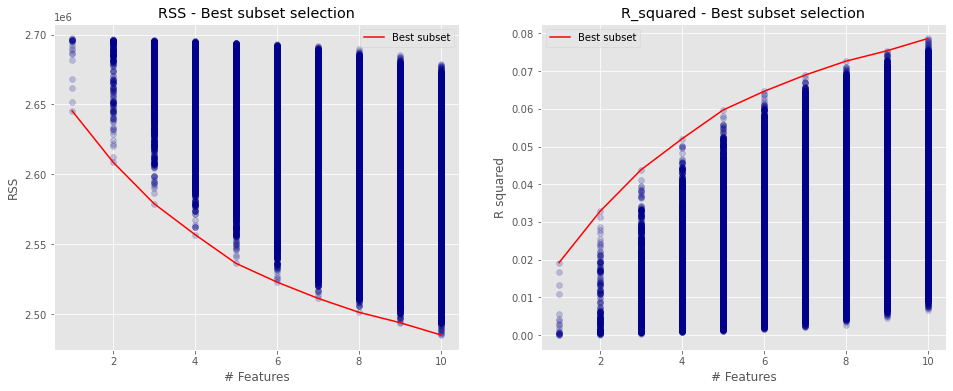

In [32]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df['R^2'], alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

In [48]:
df_min.head()
#print(df_max.head())

,numb_features,RSS,R^2,Features
10,1,2.645518e+06,0.019181,"(GLSSPC,)"
145,2,2.608782e+06,0.032801,"(RFTILT, GLSSPC)"
1145,3,2.579033e+06,0.043830,"(RFTILT, GLSSPC, NELVTR)"
5777,4,2.556881e+06,0.052043,"(RFTILT, GLSSPC, NELVTR, YRCONC)"
18278,5,2.536291e+06,0.059677,"(SQFTC, RFTILT, GLSSPC, NELVTR, YRCONC)"


## Forward Stepwise Selection

In [107]:
k = 10
remaining_features = list(one_hot.columns.values)
features = []
# Since we index once
RSS_list, R_squared_list = [np.inf], [np.inf] 
features_list = dict()

for i in trange(1,k+1, desc = 'Loop...'):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            # Store the RSS and R^2 result 
            RSS = fit_randomforest_reg(one_hot[list(combo) + features], np.ravel(y_train))  

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

Loop...:  20%|██        | 2/10 [00:42<02:49, 21.24s/it]


KeyboardInterrupt: 

In [60]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,k)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['PBAPLUS'], 2114094),
 (2, ['PBAPLUS', 'WHRECOV'], 1869638),
 (3, ['PBAPLUS', 'WHRECOV', 'PBA'], 1868774),
 (4, ['PBAPLUS', 'WHRECOV', 'PBA', 'MCHEQP'], 1861966),
 (5, ['PBAPLUS', 'WHRECOV', 'PBA', 'MCHEQP', 'OCCUPYP'], 1861794),
 (6, ['PBAPLUS', 'WHRECOV', 'PBA', 'MCHEQP', 'OCCUPYP', 'FACDCW'], 1861794),
 (7,
  ['PBAPLUS', 'WHRECOV', 'PBA', 'MCHEQP', 'OCCUPYP', 'FACDCW', 'PUBID'],
  1861794),
 (8,
  ['PBAPLUS',
   'WHRECOV',
   'PBA',
   'MCHEQP',
   'OCCUPYP',
   'FACDCW',
   'PUBID',
   'REGION'],
  1861794),
 (9,
  ['PBAPLUS',
   'WHRECOV',
   'PBA',
   'MCHEQP',
   'OCCUPYP',
   'FACDCW',
   'PUBID',
   'REGION',
   'CENDIV'],
  1861794),
 (10,
  ['PBAPLUS',
   'WHRECOV',
   'PBA',
   'MCHEQP',
   'OCCUPYP',
   'FACDCW',
   'PUBID',
   'REGION',
   'CENDIV',
   'SQFTC'],
  1861794),
 (11,
  ['PBAPLUS',
   'WHRECOV',
   'PBA',
   'MCHEQP',
   'OCCUPYP',
   'FACDCW',
   'PUBID',
   'REGION',
   'CENDIV',
   'SQFTC',
   'WLCNS'],
  1861794),
 (12,
  ['PBAPLUS',
   'WHRECOV',
  

In [95]:
feaures = 10

RSS_list, R_squared_list, feature_list = [], [], []
numb_features = []

# Loop over all, 329, features in the x_train
for feat in trange(1, feaures + 1, desc = 'Loop...'): 
    # Here we loop over all possible combinations
    for combo in itertools.combinations(x_train.columns, feat): 
        rss_result, r_sqr_result = fit_randomforest_reg(x_train[list(combo)], np.ravel(y_train))
        RSS_list.append(rss_result)
        R_squared_list.append(r_sqr_result)
        feature_list.append(combo)
        numb_features.append(len(combo))

# Now we store in a dataframe 
df = pd.DataFrame({'numb_features': numb_features, 'RSS': RSS_list, 'R^2': R_squared_list, 'Features': feature_list})


df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R^2'].transform(max) == df['R^2']]
display(df_min.head(3))
display(df_max.head(3))

Loop...:  20%|██        | 2/10 [04:32<18:08, 136.11s/it]


KeyboardInterrupt: 

## Compare our model with AIC, BIC, and Mallows CP